In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import xlrd
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import pandas as pd

# Example paths – adjust according to your folder structure
purchase_data_path = '/content/drive/MyDrive/Quantium/QVI_purchase_behaviour.csv'
transaction_data_path = '/content/drive/MyDrive/Quantium/QVI_transaction_data.xlsx'

# Load the data
purchase_df = pd.read_csv(purchase_data_path)
transaction_df = pd.read_excel(transaction_data_path)

In [ ]:
# View basic structure
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], origin='1899-12-30', unit='D')

In [ ]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# Null values
print("Purchase Data Nulls:\n", purchase_df.isnull().sum())
print("\nTransaction Data Nulls:\n", transaction_df.isnull().sum())

# Duplicates
print("\nDuplicate Transactions:", transaction_df.duplicated().sum())
print("Duplicate Customers:", purchase_df.duplicated().sum())

Purchase Data Nulls:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Transaction Data Nulls:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Duplicate Transactions: 1
Duplicate Customers: 0


In [ ]:
# View all unique entries in the product name column
transaction_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

We want to check that the products are only chips by counting the word frequencies in the product names. To make this process clearer, we can remove the digits and symbols from the names.

In [ ]:
# Remove digits from the product names
prod_name = transaction_df['PROD_NAME'].str.replace(r'[0-9]+[gG]','',regex=True);

# Remove & characters from the product names and replace with a space to separate flavours
prod_name = prod_name.str.replace(r'&',' ',regex=True);

In [ ]:
# Count the frequencies of words in product names and display counts in descending order
word_counts = pd.Series(' '.join(prod_name).split()).value_counts()

with pd.option_context('display.max_rows', None): # show all rows
  display(word_counts)

,count
Chips,49770
Kettle,41288
Smiths,28860
Salt,27976
Cheese,27890
Pringles,25102
Doritos,24962
Crinkle,23960
Corn,22063
Original,21560


In [ ]:
transaction_df.shape

(264836, 8)

In [ ]:
# Remove salsas from the dataset
transaction_df = transaction_df[transaction_df['PROD_NAME'].str.contains(r"[Ss]alsa") == False]
transaction_df.shape # check for a reduction in no of rows

(246742, 8)

In [ ]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [ ]:
# Check if there are any nans in the dataset
transaction_df.isnull().values.any()

np.False_

From the summary, there is at least one transaction with 200 packets. Let's investigate this purchase further.


In [ ]:
# Filter the entries that have 200 packets.
transaction_df.loc[transaction_df['PROD_QTY'] == 200.0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


from matplotlib import pyplot as plt
_df_0['TXN_ID'].plot(kind='hist', bins=20, title='TXN_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DATE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DATE'}, axis=1)
              .sort_values('DATE', ascending=True))
  xs = counted['DATE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DATE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DATE'}, axis=1)
              .sort_values('DATE', ascending=True))
  xs = counted['DATE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['STORE_NBR']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'STORE_NBR'}, axis=1)
              .sort_values('STORE_NBR', ascending=True))
  xs = counted['STORE_NBR']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('STORE_NBR', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('STORE_NBR')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['LYLTY_CARD_NBR']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'LYLTY_CARD_NBR'}, axis=1)
              .sort_values('LYLTY_CARD_NBR', ascending=True))
  xs = counted['LYLTY_CARD_NBR']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('LYLTY_CARD_NBR', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('LYLTY_CARD_NBR')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['TXN_ID'].plot(kind='line', figsize=(8, 4), title='TXN_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
transaction_df.loc[transaction_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Looks like these are duplicate values made by the same customer. So we will remove them.

In [ ]:
# Remove the transactions
transaction_df = transaction_df[transaction_df['LYLTY_CARD_NBR'] != 226000]

In [ ]:
# Recheck the data summary
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [ ]:
# Add a new column to data with packet sizes and extract sizes from product name column
transaction_df.insert(8, "PACK_SIZE", transaction_df['PROD_NAME'].str.extract('(\d+)').astype(float), True)

# Sort by packet sizes to check for outliers
transaction_df.sort_values(by='PACK_SIZE')

<>:2: DeprecationWarning: invalid escape sequence '\d'
<>:2: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-20-cf72fe0547e9>:2: DeprecationWarning: invalid escape sequence '\d'
  transaction_df.insert(8, "PACK_SIZE", transaction_df['PROD_NAME'].str.extract('(\d+)').astype(float), True)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
259246,2019-03-08,20,20172,17144,38,Infuzions Mango Chutny Papadums 70g,1,2.40,70.0
259135,2019-02-05,16,16458,14571,38,Infuzions Mango Chutny Papadums 70g,1,2.40,70.0
258984,2019-02-23,9,9030,8391,38,Infuzions Mango Chutny Papadums 70g,2,4.80,70.0
258943,2018-11-07,6,6473,6281,38,Infuzions Mango Chutny Papadums 70g,2,4.80,70.0
259305,2018-09-24,22,22113,18261,38,Infuzions Mango Chutny Papadums 70g,2,4.80,70.0
...,...,...,...,...,...,...,...,...,...
145130,2019-01-25,175,175285,176546,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.80,380.0
145165,2018-12-08,175,175375,176903,4,Dorito Corn Chp Supreme 380g,2,13.00,380.0
145111,2019-05-10,175,175149,176010,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.80,380.0
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25,380.0


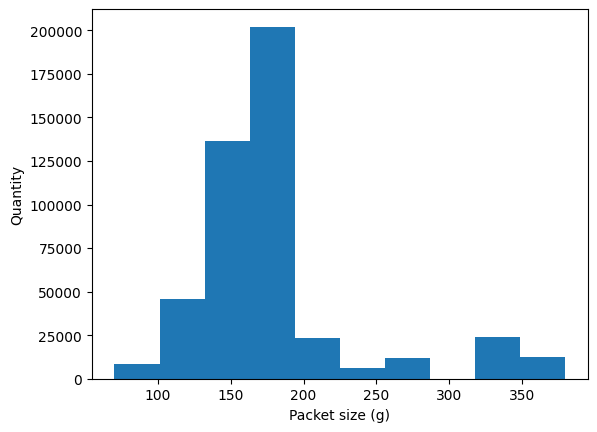

In [ ]:
# Plot a histogram to visualise distribution of pack sizes.
plt.hist(transaction_df['PACK_SIZE'], weights=transaction_df['PROD_QTY']);
plt.xlabel('Packet size (g)');
plt.ylabel('Quantity');

In [ ]:
# Add a column to extract the first word of each product name to.
transaction_df.insert(9, "BRAND_NAME",transaction_df['PROD_NAME'].str.split().str[0], True)
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos


Now we want to examine the customer data.

In [ ]:
# Now examine customer data
cust_df = purchase_df.copy()
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# Rename "PREMIUM_CUSTOMER" to "MEMBER_TYPE" for easier identification of the column data
cust_df = cust_df.rename(columns={'PREMIUM_CUSTOMER': 'MEMBER_TYPE'})

In [ ]:
# Check the summary of the customer data
cust_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [ ]:
# Join the customer and transaction datasets
merged_df = transaction_df.merge(cust_df, how='left', on='LYLTY_CARD_NBR')
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
#Sort transactons by date
full_df = merged_df.reset_index()
full_df = full_df.sort_values(by='DATE').reset_index(drop=True)
full_df

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE
0,8572,2018-07-01,88,88140,86914,25,Pringles SourCream Onion 134g,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Mainstream
1,144861,2018-07-01,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150.0,Kettle,RETIREES,Mainstream
2,168994,2018-07-01,199,199014,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110.0,Infuzions,RETIREES,Premium
3,214152,2018-07-01,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0,165.0,RRD,YOUNG SINGLES/COUPLES,Budget
4,97432,2018-07-01,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4,330.0,Doritos,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,9601,2019-06-30,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175.0,NCC,MIDAGE SINGLES/COUPLES,Mainstream
246736,105465,2019-06-30,207,207155,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4,134.0,Pringles,OLDER SINGLES/COUPLES,Mainstream
246737,213436,2019-06-30,10,10140,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Budget
246738,213283,2019-06-30,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0,175.0,French,YOUNG SINGLES/COUPLES,Budget


In [ ]:
# Check for nulls in the full dataset
full_df.isnull().values.any()

np.False_

Define Key Metrics per Segment. Data analysis on customer segments

In [ ]:
# Total sales by segment
segment_sales = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['TOT_SALES'].sum().reset_index()
segment_sales.sort_values(by = "TOT_SALES", ascending = False)

,LIFESTAGE,MEMBER_TYPE,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


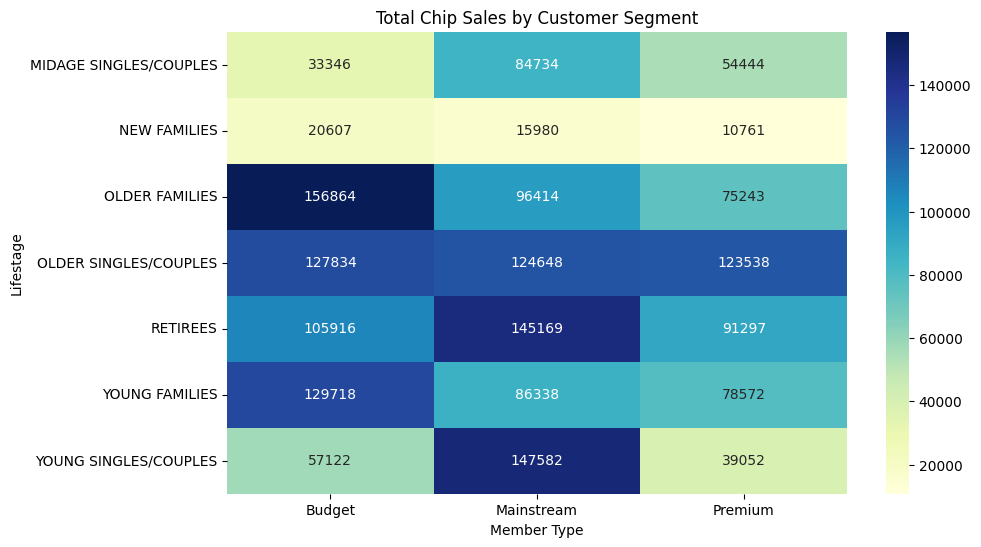

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total sales heatmap
pivot = segment_sales.pivot(index='LIFESTAGE', columns='MEMBER_TYPE', values='TOT_SALES')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Total Chip Sales by Customer Segment')
plt.ylabel('Lifestage')
plt.xlabel('Member Type')
plt.show()

In [ ]:
# Avg spend per transaction
avg_spend = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['TOT_SALES'].mean().reset_index(name='AVG_SPEND')
avg_spend.sort_values(by = "AVG_SPEND", ascending = False)

,LIFESTAGE,MEMBER_TYPE,AVG_SPEND
1,MIDAGE SINGLES/COUPLES,Mainstream,7.637156
19,YOUNG SINGLES/COUPLES,Mainstream,7.551279
14,RETIREES,Premium,7.461315
11,OLDER SINGLES/COUPLES,Premium,7.459997
12,RETIREES,Budget,7.445786
9,OLDER SINGLES/COUPLES,Budget,7.444305
4,NEW FAMILIES,Mainstream,7.313364
10,OLDER SINGLES/COUPLES,Mainstream,7.306049
15,YOUNG FAMILIES,Budget,7.302705
3,NEW FAMILIES,Budget,7.297256


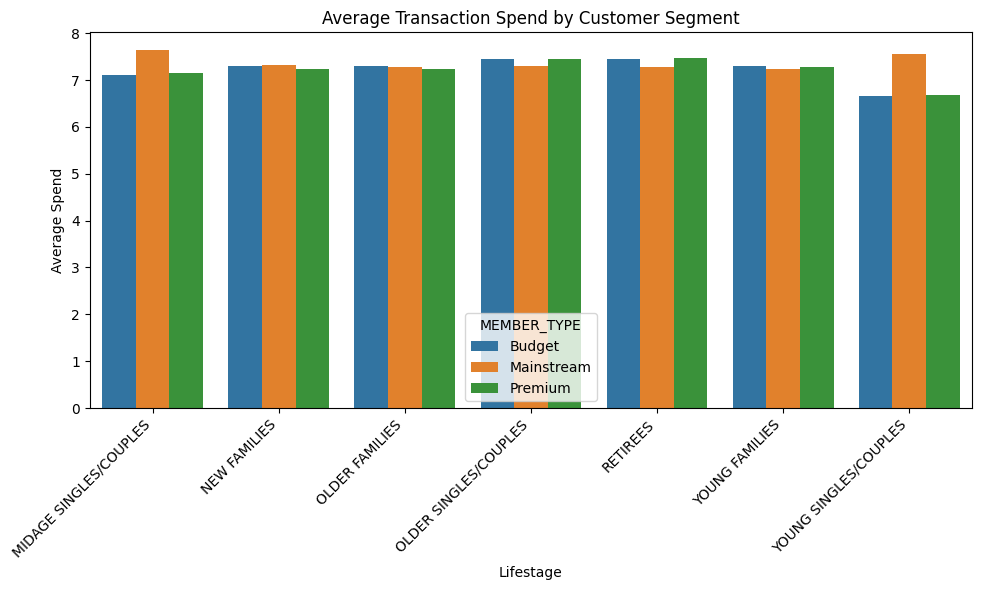

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='AVG_SPEND', hue='MEMBER_TYPE', data=avg_spend)
plt.title('Average Transaction Spend by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Spend')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Total units purchased
total_qty = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['PROD_QTY'].sum().reset_index(name='TOTAL_UNITS')
total_qty.sort_values(by = "TOTAL_UNITS", ascending = False)

,LIFESTAGE,MEMBER_TYPE,TOTAL_UNITS
6,OLDER FAMILIES,Budget,41853
13,RETIREES,Mainstream,37677
19,YOUNG SINGLES/COUPLES,Mainstream,36225
15,YOUNG FAMILIES,Budget,34482
9,OLDER SINGLES/COUPLES,Budget,32883
10,OLDER SINGLES/COUPLES,Mainstream,32607
11,OLDER SINGLES/COUPLES,Premium,31695
12,RETIREES,Budget,26932
7,OLDER FAMILIES,Mainstream,25804
14,RETIREES,Premium,23266


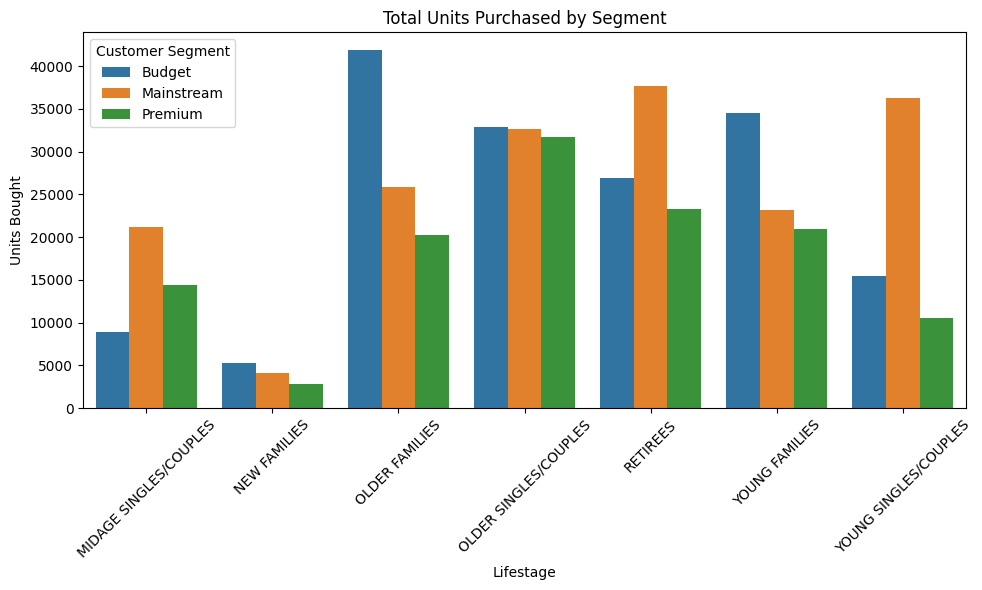

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=total_qty, x='LIFESTAGE', y='TOTAL_UNITS', hue='MEMBER_TYPE')
plt.title('Total Units Purchased by Segment')
plt.xticks(rotation=45)
plt.ylabel('Units Bought')
plt.xlabel('Lifestage')
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

In [ ]:
# Compute Average Price per Unit by Segment
# Calculate price per unit
full_df['PRICE_PER_UNIT'] = full_df['TOT_SALES'] / full_df['PROD_QTY']

# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = (full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['PRICE_PER_UNIT'].mean().reset_index())

avg_price_per_unit.sort_values(by='PRICE_PER_UNIT', ascending=False)

,LIFESTAGE,MEMBER_TYPE,PRICE_PER_UNIT
19,YOUNG SINGLES/COUPLES,Mainstream,4.065642
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
12,RETIREES,Budget,3.924404
14,RETIREES,Premium,3.920942
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
11,OLDER SINGLES/COUPLES,Premium,3.893182
9,OLDER SINGLES/COUPLES,Budget,3.882096
5,NEW FAMILIES,Premium,3.872110
13,RETIREES,Mainstream,3.844294


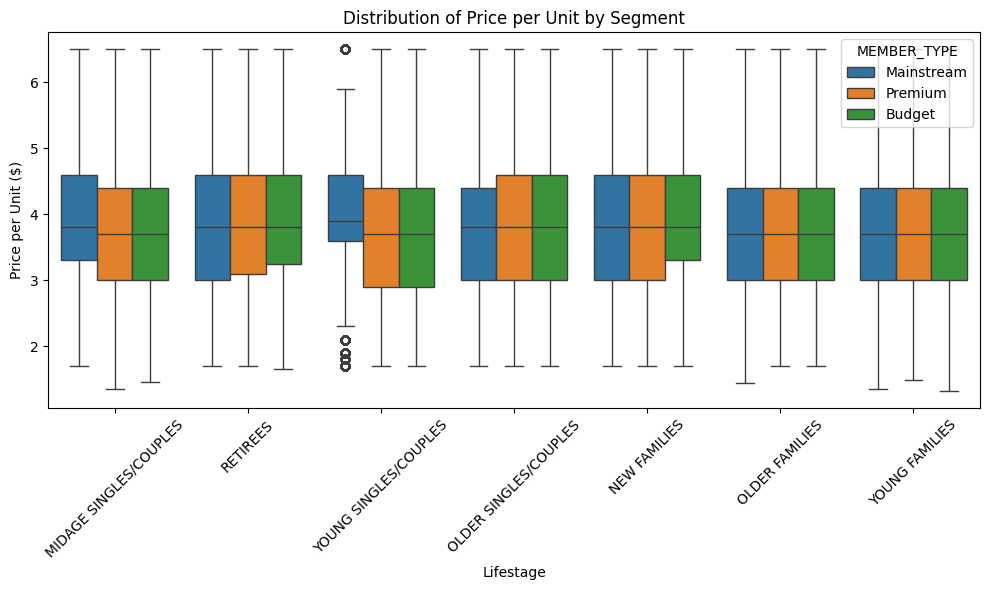

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_df, x='LIFESTAGE', y='PRICE_PER_UNIT', hue='MEMBER_TYPE')
plt.title('Distribution of Price per Unit by Segment')
plt.xticks(rotation=45)
plt.ylabel('Price per Unit ($)')
plt.xlabel('Lifestage')
plt.tight_layout()
plt.show()

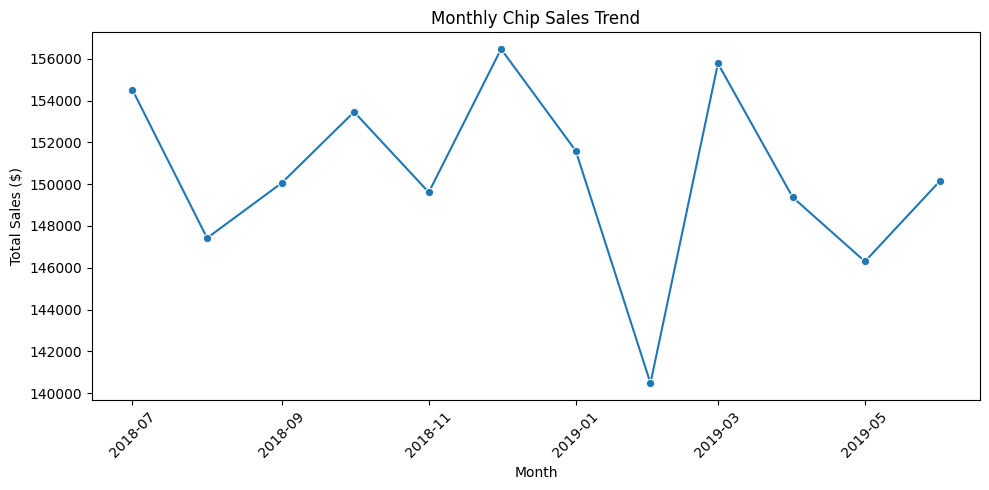

In [ ]:
#Time trends in chip sales
full_df['MONTH'] = full_df['DATE'].dt.to_period('M').dt.to_timestamp()
monthly_sales = full_df.groupby('MONTH')['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='MONTH', y='TOT_SALES', marker='o')
plt.title('Monthly Chip Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales ($)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

### 📅 Monthly Chip Sales Trend – Insight

The sales trend shows consistent chip demand throughout the year with two strong peaks in:
- **November 2018** — likely driven by festive season shopping
- **March 2019** — possibly aligned with major sporting events

A notable dip in **February 2019** suggests a seasonal slowdown, potentially due to fewer days or post-holiday consumer fatigue.

**Recommendation:**  
- Boost campaign spend and visibility during high-demand months like March and November.  
- Launch counter-seasonal promotions or loyalty campaigns in February to smooth revenue and maintain customer engagement.


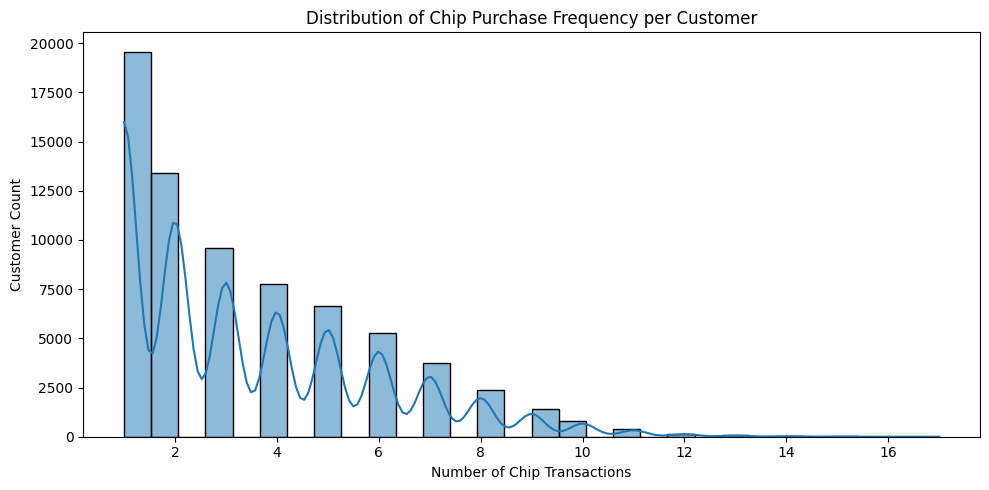

In [ ]:
#Customer Loyalty- Repeat Purchase Frequency
repeat_customers = full_df.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().reset_index(name='NUM_TXNS')

plt.figure(figsize=(10, 5))
sns.histplot(repeat_customers['NUM_TXNS'], bins=30, kde=True)
plt.title('Distribution of Chip Purchase Frequency per Customer')
plt.xlabel('Number of Chip Transactions')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()

### 🔁 Repeat Purchase Frequency – Loyalty Insight

The purchase frequency histogram reveals that:

- **Most customers (~1 transaction)** are likely casual or trial buyers
- A **long tail of loyal customers (5+ transactions)** exists, offering high lifetime value
- Moderate-frequency buyers (2–4 transactions) present the biggest growth opportunity

**Recommendation:**  
- **Re-engage one-time buyers** with “second purchase” incentives (e.g., email coupons or bundle discounts)
- **Reward high-frequency buyers** with exclusive loyalty perks or premium SKUs
- **Nurture mid-frequency buyers** to become loyalists through gamified promotions or personalized offers


# **🔍 INSIGHTS BY SEGMENT**
# **💰 1. Total Sales**
Mainstream Midage Singles/Couples and Mainstream Retirees are the biggest spenders on chips. Premium segments (especially older demographics) also contribute substantially.

# **💳 2. Average Spend per Transaction**
Premium customers across all lifestages tend to spend more per visit — especially Young Singles/Couples. This indicates openness to higher-quality or branded chip products.

# **🧃 3. Quantity Purchased**
Budget Midage and Retiree segments buy the most volume, possibly indicating bulk or price-conscious behavior. Suggests that these segments may respond well to value pack promotions.

# **💵 4. Price Sensitivity**
Budget segments have the lowest price per unit, while Premium segments pay significantly more. Reinforces the opportunity to target Premium buyers with gourmet or limited-edition flavors.

# **🏷️ 5. Top Brands by Segment**
Kettle, Smiths, and Doritos dominate sales across most segments. Kettle stands out among Premium customers, while Smiths appeals more broadly.

# **📌 Strategic Recommendations for Julia**


*   Target “Midage Singles/Couples” and “Retirees” — they are your highest revenue drivers.
*   Offer premium product bundles to younger, higher-spending Premium segments.
*   Promote large pack sizes to Budget segments in mid and older life stages.
*   Use Kettle and Smiths as anchor brands — feature them prominently in promotions by segment.
*   Consider product line extension for high-spend segments: e.g., health-conscious or artisan chips for Premium customers.















